In [0]:
#! pip install quandl

## ridge and lasso regression add some regularaization (bias in the loss function)
## and elastic net is the mean the combination of the ridge and the lasso regression

normal regression is not recommended so we do the ridge and lasso and elasticnet

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import quandl

In [0]:
quandl.ApiConfig.api_key = "zuiQMfguw3rRgLvkCzxk"
df = quandl.get('WIKI/GOOGL')

In [4]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [0]:
df=df[['Open', 'High', 'Low', 'Close', 'Volume','Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [7]:
df.head()

,Open,High,Low,Close,Volume,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [8]:
df.corr()[['Adj. High']]

,Adj. High
Open,0.815283
High,0.815145
Low,0.815380
Close,0.815374
Volume,-0.547943
Adj. Open,0.999906
Adj. High,1.000000
Adj. Low,0.999832
Adj. Close,0.999869
Adj. Volume,-0.547943


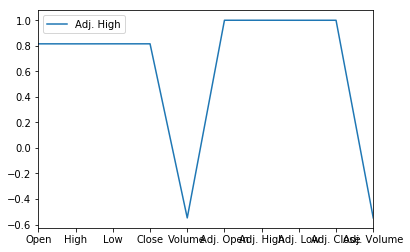

In [9]:
df.corr()[['Adj. High']].plot()

In [0]:
df=df[['Open', 'High', 'Low', 'Close','Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close']]

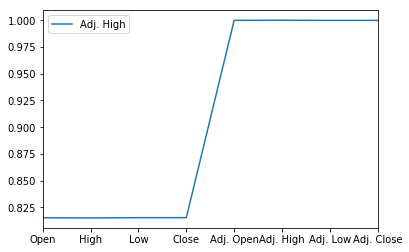

In [11]:
df.corr()[['Adj. High']].plot()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [0]:
X = df.drop('Adj. Close',axis=1)


In [14]:
X.head()

,Open,High,Low,Close,Adj. Open,Adj. High,Adj. Low
Date,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,50.159839,52.191109,48.128568
2004-08-20,101.01,109.08,100.50,108.310,50.661387,54.708881,50.405597
2004-08-23,110.76,113.48,109.05,109.400,55.551482,56.915693,54.693835
2004-08-24,111.24,111.60,103.57,104.870,55.792225,55.972783,51.945350
2004-08-25,104.76,108.00,103.88,106.000,52.542193,54.167209,52.100830


In [0]:
y = df[['Adj. Close']]

In [16]:
y.head()

,Adj. Close
Date,
2004-08-19,50.322842
2004-08-20,54.322689
2004-08-23,54.869377
2004-08-24,52.597363
2004-08-25,53.164113


In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [29]:
lass = Lasso()
lass.fit(x_train,y_train)
pred_lass = lass.predict(x_test)
mse1 = mean_squared_error(y_test,pred_lass)
lin_rmse = np.sqrt(mse1)
print (lin_rmse)
cross_val_score(lass,x_train,y_train,cv=10)

2.895083010820016


array([0.99992902, 0.99976234, 0.99990031, 0.99982201, 0.99991491,
       0.99992012, 0.99989168, 0.99988097, 0.99991732, 0.99988604])

In [30]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pred_ridge = lass.predict(x_test)
mse2 = mean_squared_error(y_test,pred_lass)
lin_rmse2 = np.sqrt(mse2)
print (lin_rmse2)
cross_val_score(ridge,x_train,y_train,cv=10)

2.895083010820016


array([0.9999861 , 0.99998948, 0.99998152, 0.99999165, 0.99999003,
       0.99998827, 0.99998949, 0.9999901 , 0.99999018, 0.99999079])

In [31]:
enet = ElasticNet()
enet.fit(x_train,y_train)
pred_enet = lass.predict(x_test)
mse3 = mean_squared_error(y_test,pred_lass)
lin_rmse3 = np.sqrt(mse3)
print (lin_rmse3)
cross_val_score(enet,x_train,y_train,cv=10)

2.895083010820016


array([0.9999293 , 0.99976495, 0.99990171, 0.99982407, 0.99991641,
       0.99992057, 0.99989383, 0.99988215, 0.9999188 , 0.99988841])

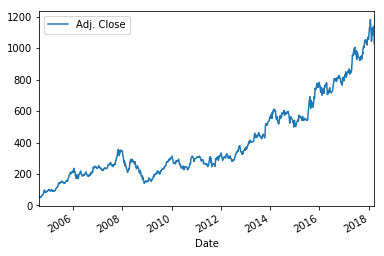

In [33]:
y_test.plot()

In [0]:
def new_plot(model):
  new_mod=model.predict(x_test)
  date=y_test.index
  dm={'Date':date,'Adj_Close':new_mod}
  mod_df=pd.DataFrame(dm)
  mod_df.set_index("Date", inplace = True)
  mod_df.head()
  p = y_test.plot()
  mod_df.plot(ax=p,figsize=(50, 40))

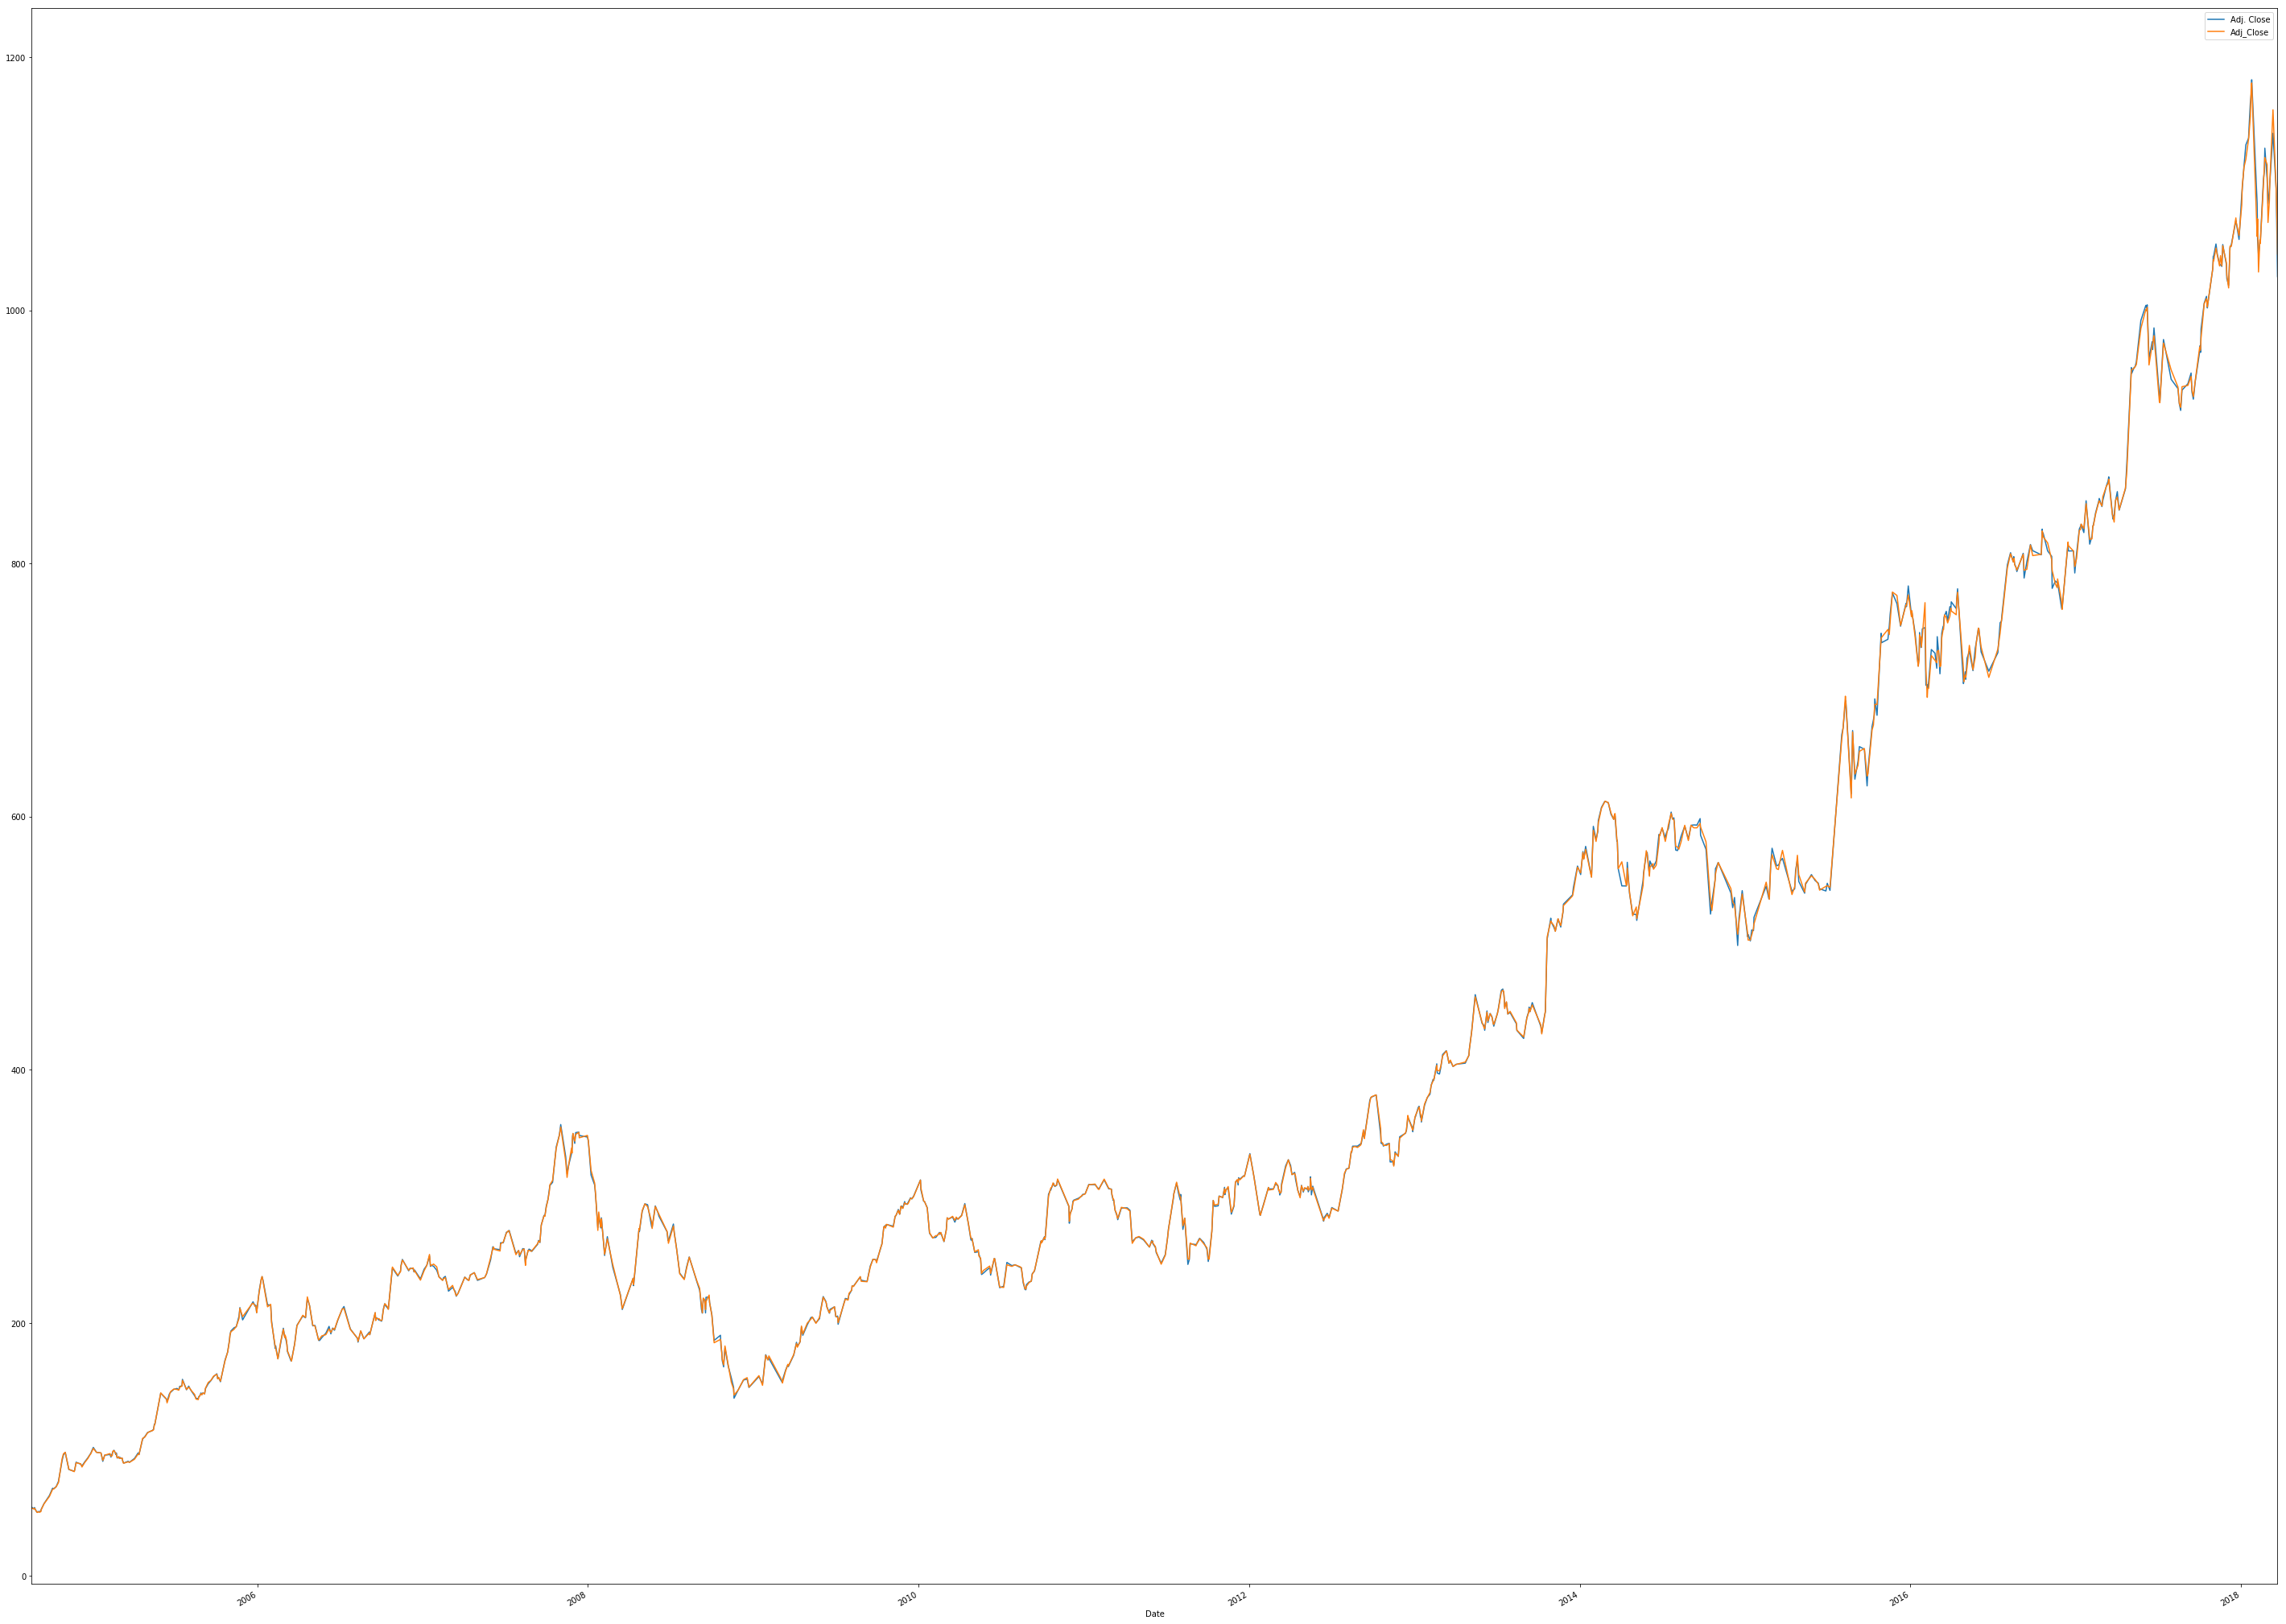

In [47]:
enet_pred=enet.predict(x_test)
date=y_test.index
dm={'Date':date,'Adj_Close':enet_pred}
enet_df=pd.DataFrame(dm)
enet_df.set_index("Date", inplace = True)
enet_df.head()
p = y_test.plot()
enet_df.plot(ax=p,figsize=(50, 40))

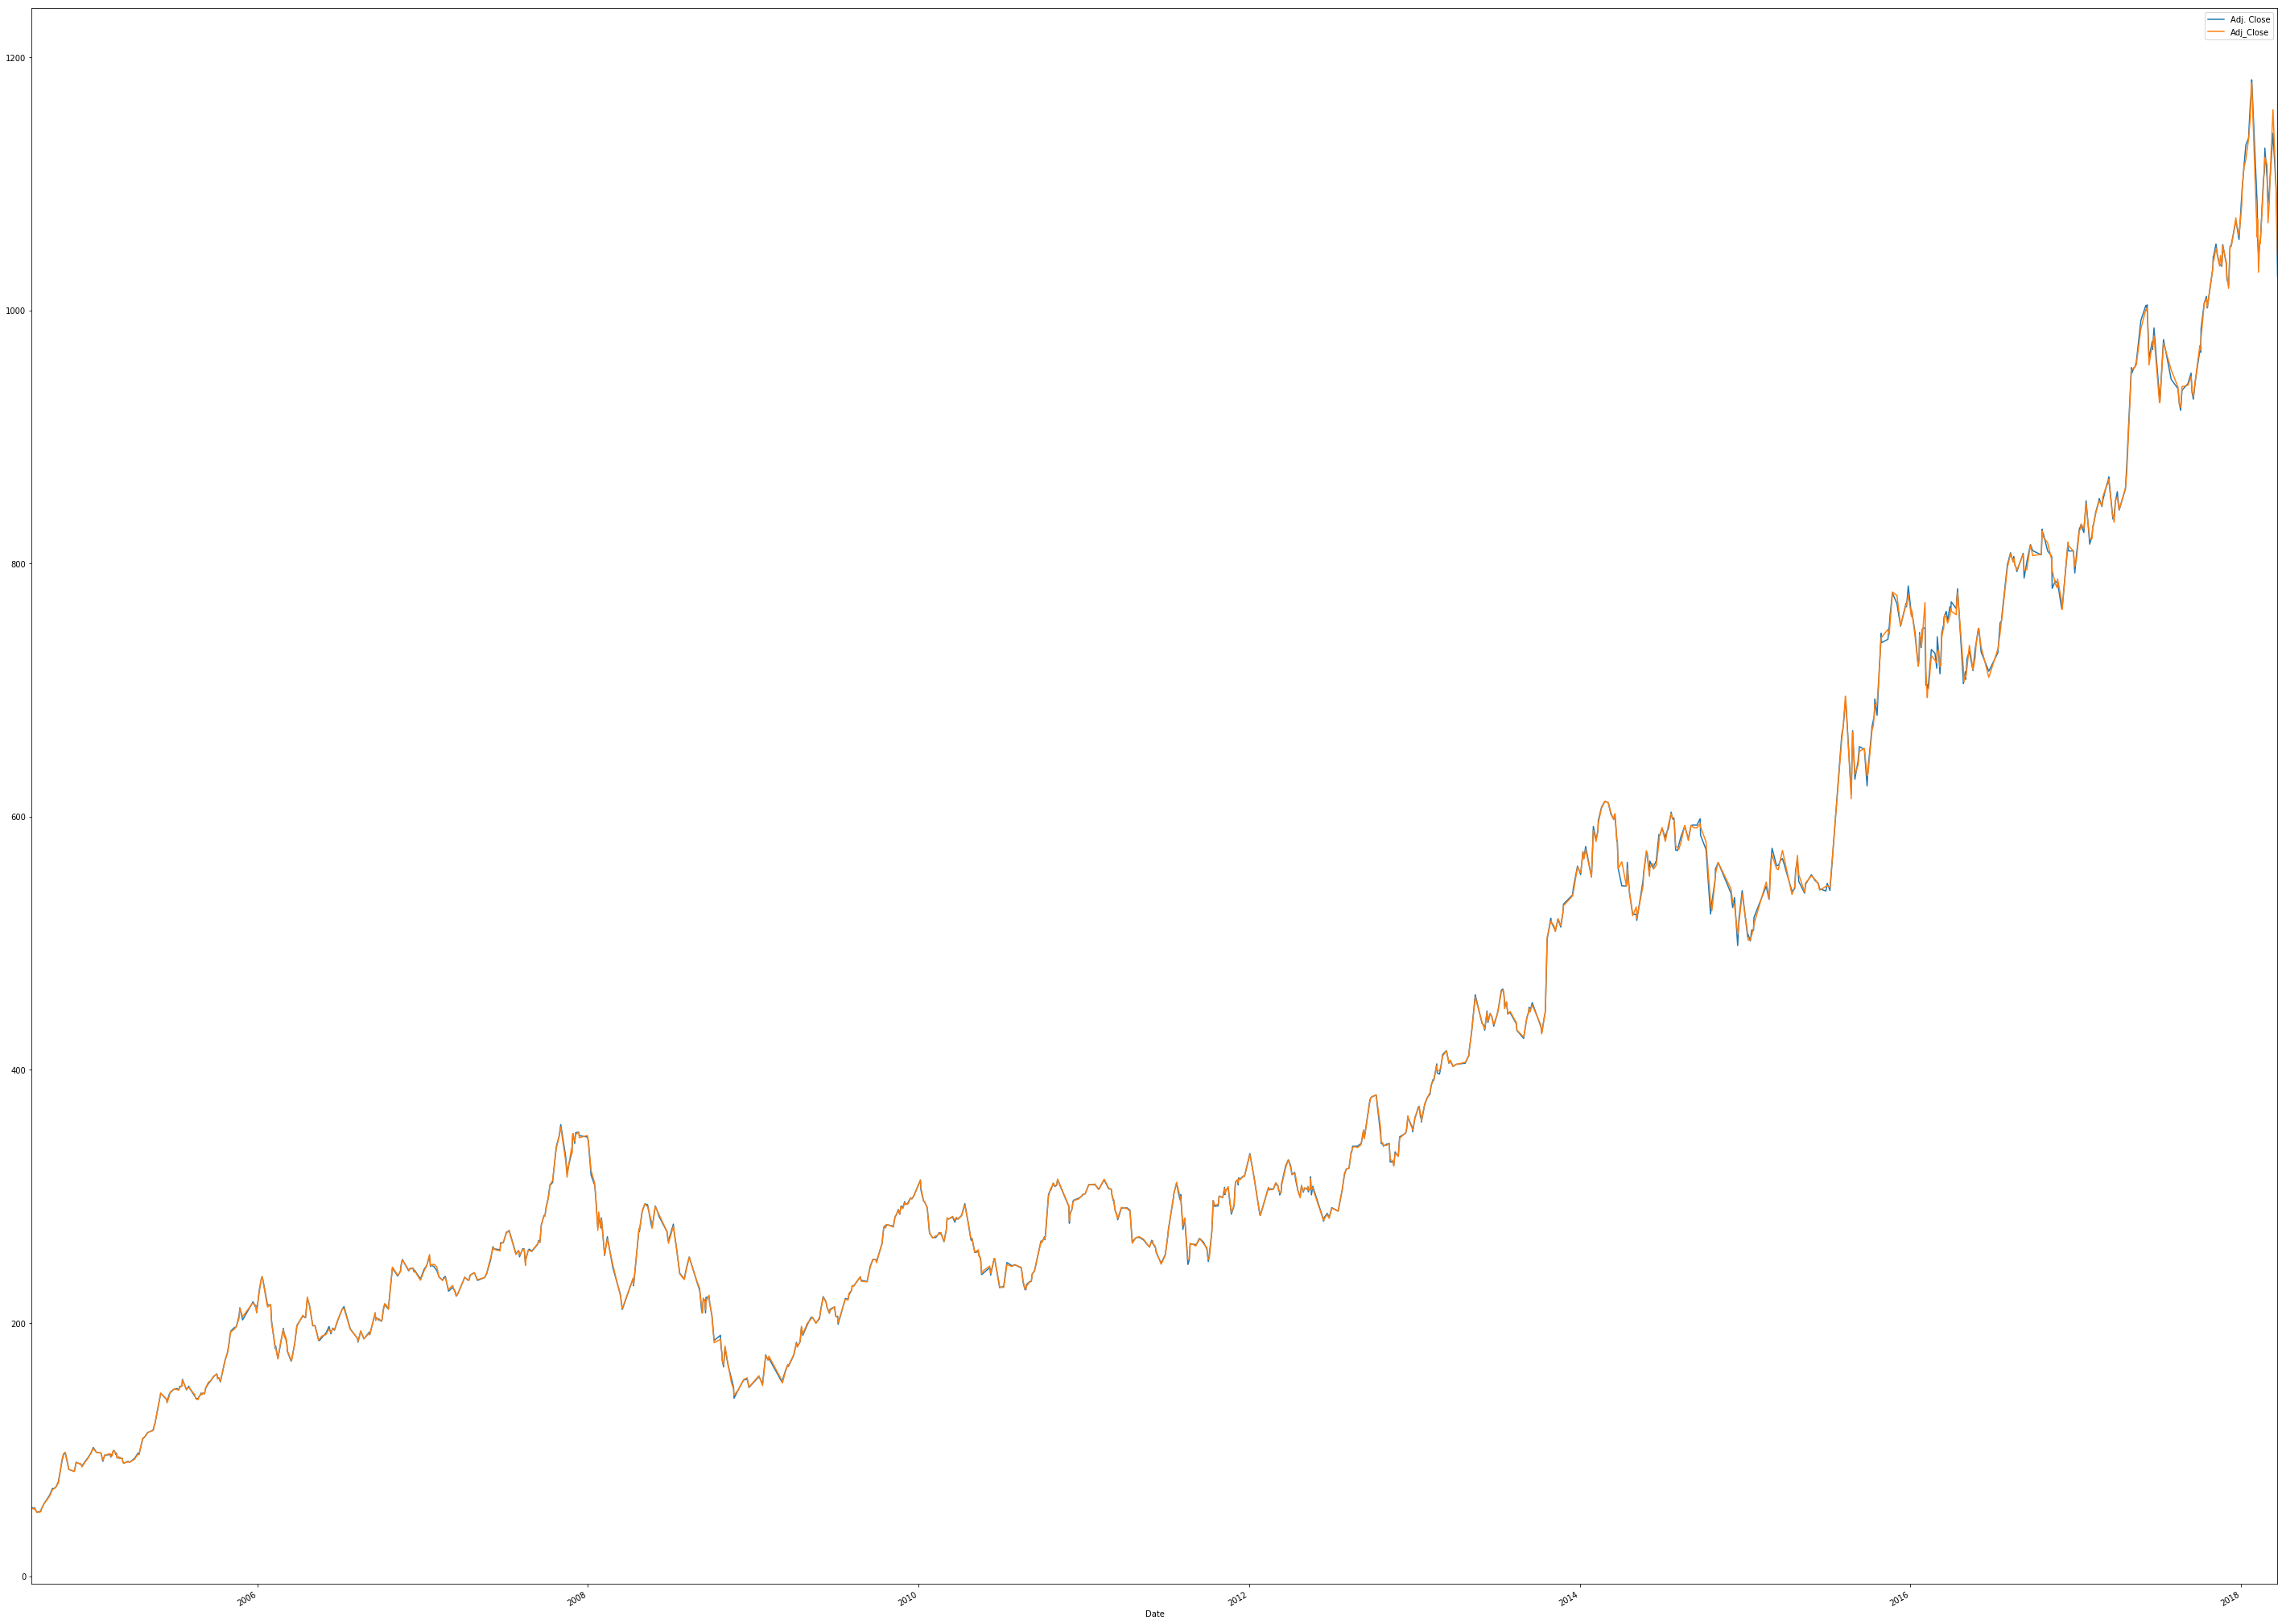

In [51]:
new_plot(lass)

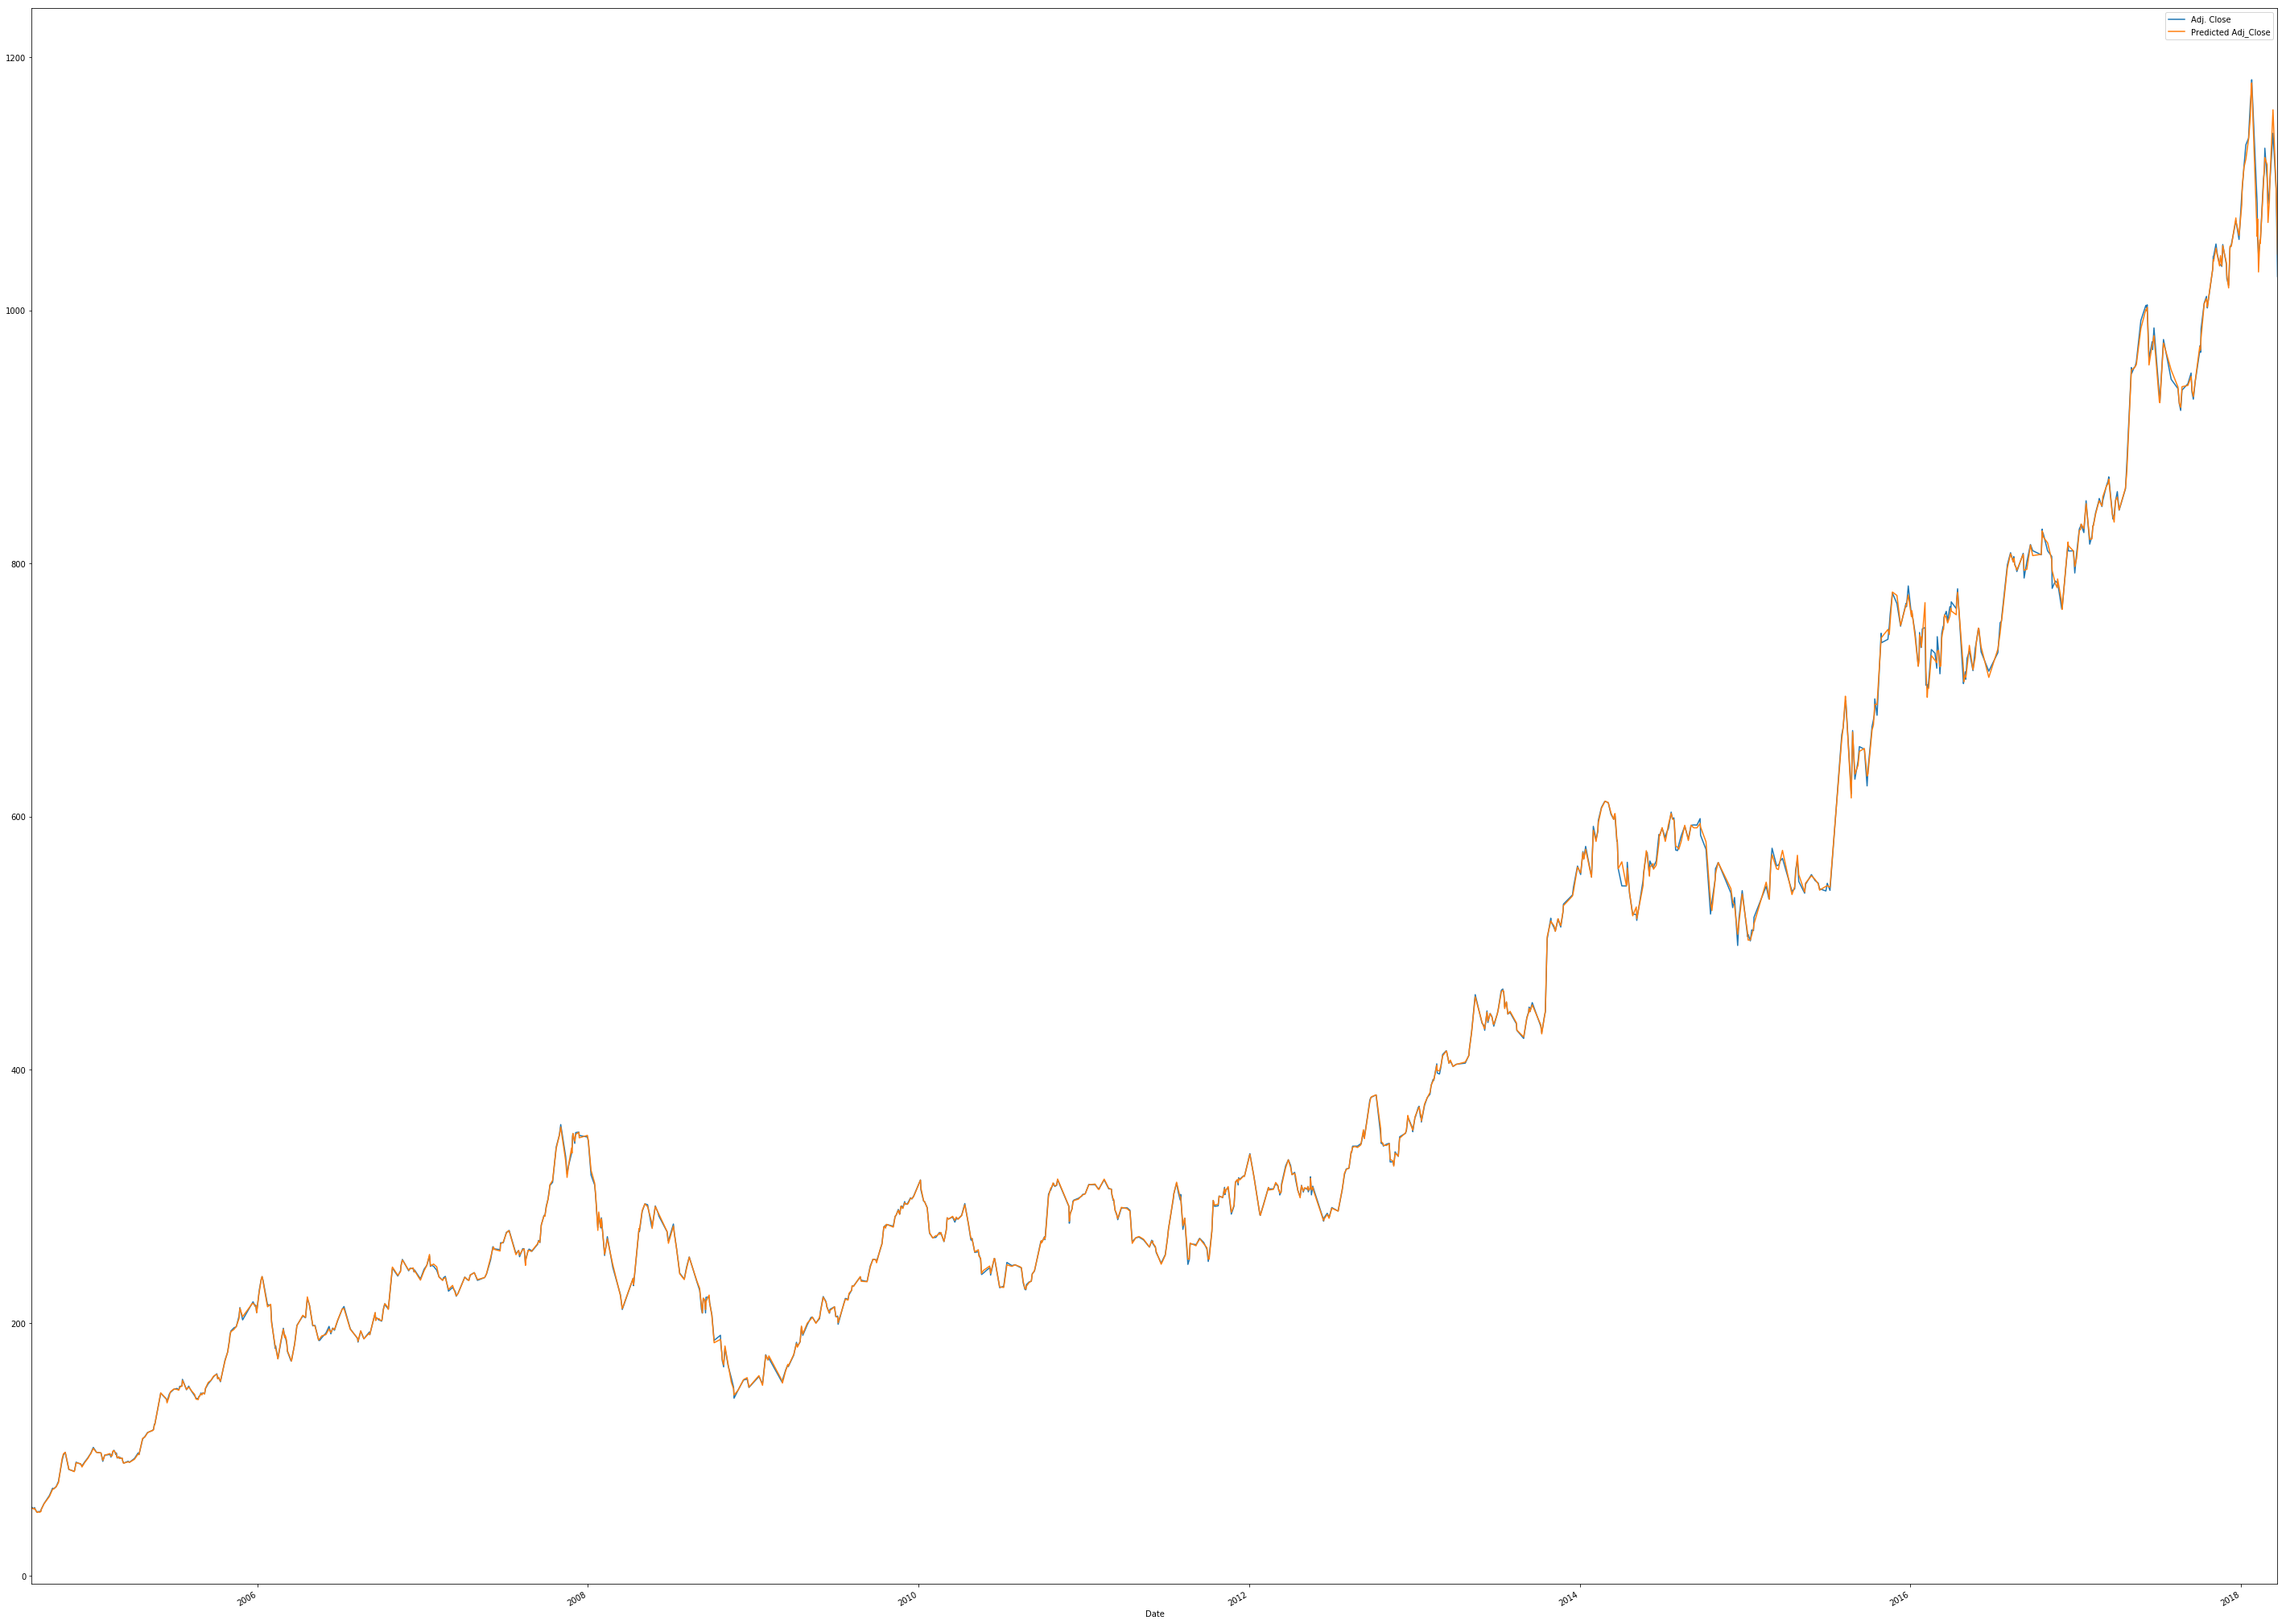

In [56]:
redge_pred=ridge.predict(x_test)
date=y_test.index
dm={'Date':date,'Predicted Adj_Close':enet_pred}
ridge_df=pd.DataFrame(dm)
ridge_df.set_index("Date", inplace = True)
#enet_df.head()
p = y_test.plot()
ridge_df.plot(ax=p,figsize=(50, 40))